# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.io import loadmat

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
# Load the dataset from your Drive folder

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [24]:
x_train=train['X']
y_train=train['y']

In [25]:
numbers_show=np.random.randint(73257,size=10)
x_show=x_train[...,numbers_show]
y_show=y_train[numbers_show,...]

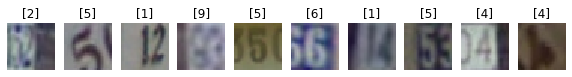

In [26]:
fig, sp = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    img=x_show[...,i]
    sp[i].axis('Off')
    sp[i].set_title(str(y_show[i]))
    sp[i].imshow(np.squeeze(img))
plt.show()

In [27]:
x_train=np.mean(train['X'], axis=2, keepdims=True)
numbers_show=np.random.randint(73257,size=10)
x_show=x_train[...,numbers_show]
y_show=y_train[numbers_show,...]

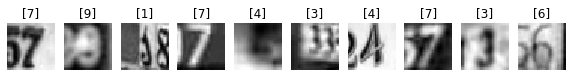

In [28]:
fig, sp = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    img=x_show[...,i]
    sp[i].axis('Off')
    sp[i].set_title(str(y_show[i]))
    sp[i].imshow(np.squeeze(img),cmap='gray')
plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [237]:
x_train=np.mean(train['X'], axis=2, keepdims=True)
x_train=np.rollaxis(x_train,3)
y_train=np.squeeze(train['y'])-1

In [243]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[32,32,1]),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [244]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_84 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 10)                330       
Total params: 146,026
Trainable params: 146,026
Non-trainable params: 0
_______________________________________________

In [245]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [246]:
checkpoint1=tf.keras.callbacks.ModelCheckpoint(
    filepath='model_checkpoints1/', 
    monitor='val_accuracy' ,frequency='epoch', save_best_only=True)
checkpoint2=tf.keras.callbacks.ModelCheckpoint(
    filepath='model_checkpoints2/', 
    monitor='val_accuracy' ,frequency='epoch', save_best_only=True)
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,batch,logs={}):
        if logs['loss']<0.20:
            self.model.stop_training = True
mycallback=myCallback()

In [247]:
history=model.fit(x_train, y_train,validation_split=0.2,epochs=30, callbacks=[checkpoint1, mycallback])

Epoch 1/30
1832/1832 [==============================] - 5s 3ms/step - loss: 4.8646 - accuracy: 0.1522 - val_loss: 2.0326 - val_accuracy: 0.2893
Epoch 2/30
1832/1832 [==============================] - 5s 3ms/step - loss: 1.8866 - accuracy: 0.3399 - val_loss: 1.5351 - val_accuracy: 0.4779
Epoch 3/30
1832/1832 [==============================] - 5s 3ms/step - loss: 1.5667 - accuracy: 0.4762 - val_loss: 1.5094 - val_accuracy: 0.4954
Epoch 4/30
1832/1832 [==============================] - 5s 3ms/step - loss: 1.3796 - accuracy: 0.5535 - val_loss: 1.4119 - val_accuracy: 0.5380
Epoch 5/30
1832/1832 [==============================] - 6s 3ms/step - loss: 1.2879 - accuracy: 0.5842 - val_loss: 1.2253 - val_accuracy: 0.6135
Epoch 6/30
1832/1832 [==============================] - 5s 3ms/step - loss: 1.2392 - accuracy: 0.6033 - val_loss: 1.2041 - val_accuracy: 0.6215
Epoch 7/30
1832/1832 [==============================] - 4s 2ms/step - loss: 1.1928 - accuracy: 0.6247 - val_loss: 1.3287 - val_accuracy:

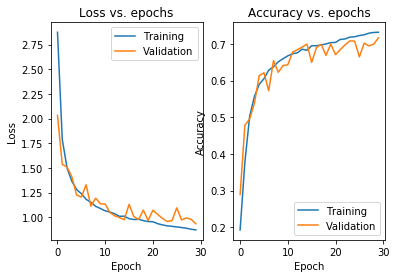

In [248]:
sp1 = plt.subplot(1,2,1)
sp1.plot(history.history['loss'])
sp1.plot(history.history['val_loss'])
sp1.set_title('Loss vs. epochs')
sp1.set_ylabel('Loss')
sp1.set_xlabel('Epoch')
sp1.legend(['Training', 'Validation'], loc='upper right')
sp2 = plt.subplot(1,2,2)
sp2.plot(history.history['accuracy'])
sp2.plot(history.history['val_accuracy'])
sp2.set_title('Accuracy vs. epochs')
sp2.set_ylabel('Accuracy')
sp2.set_xlabel('Epoch')
sp2.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [249]:
x_test=np.mean(test['X'], axis=2, keepdims=True)
x_test=np.rollaxis(x_test,3)
y_test=np.squeeze(test['y'])-1

In [250]:
y_pred=model.predict(x_test)

In [251]:
test_acc=tf.keras.metrics.sparse_categorical_accuracy(y_test, y_pred).numpy().mean()
print('The accuracy of the test set is',test_acc,'.')

The accuracy of the test set is 0.6918408 .


In [252]:
test_acc=tf.keras.metrics.SparseCategoricalAccuracy()
test_acc.update_state(y_test,y_pred)
print('The accuracy of the test set is',test_acc.result().numpy(),'.')

The accuracy of the test set is 0.6918408 .


In [253]:
test_loss=tf.keras.metrics.SparseCategoricalCrossentropy()
test_loss.update_state(y_test,y_pred)
print('The loss of the test set is',test_loss.result().numpy(),'.')

The loss of the test set is 1.0397336 .


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [196]:
x_train=np.mean(train['X'], axis=2, keepdims=True)
x_train=np.rollaxis(x_train,3)
y_train=np.squeeze(train['y'])-1

In [197]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',strides=1,activation='relu',input_shape=[32,32,1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(32,(3,3),padding='same',strides=1,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [198]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 10, 10, 32)        128       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 288)             

In [199]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [200]:
history2=model2.fit(x_train, y_train,validation_split=0.2,epochs=30, callbacks=[checkpoint2, mycallback])

Epoch 1/30
1832/1832 [==============================] - 40s 21ms/step - loss: 1.9122 - accuracy: 0.3343 - val_loss: 0.8214 - val_accuracy: 0.7572
Epoch 2/30
1832/1832 [==============================] - 42s 23ms/step - loss: 0.7909 - accuracy: 0.7553 - val_loss: 0.6093 - val_accuracy: 0.8104
Epoch 3/30
1832/1832 [==============================] - 42s 23ms/step - loss: 0.6547 - accuracy: 0.8006 - val_loss: 0.5089 - val_accuracy: 0.8466
Epoch 4/30
1832/1832 [==============================] - 42s 23ms/step - loss: 0.5932 - accuracy: 0.8218 - val_loss: 0.4949 - val_accuracy: 0.8514
Epoch 5/30
1832/1832 [==============================] - 40s 22ms/step - loss: 0.5283 - accuracy: 0.8405 - val_loss: 0.5624 - val_accuracy: 0.8330
Epoch 6/30
1832/1832 [==============================] - 39s 21ms/step - loss: 0.5143 - accuracy: 0.8463 - val_loss: 0.4619 - val_accuracy: 0.8591
Epoch 7/30
1832/1832 [==============================] - 39s 21ms/step - loss: 0.4937 - accuracy: 0.8535 - val_loss: 0.4910 -

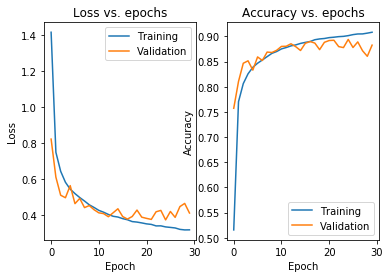

In [201]:
sp1 = plt.subplot(1,2,1)
sp1.plot(history2.history['loss'])
sp1.plot(history2.history['val_loss'])
sp1.set_title('Loss vs. epochs')
sp1.set_ylabel('Loss')
sp1.set_xlabel('Epoch')
sp1.legend(['Training', 'Validation'], loc='upper right')
sp2 = plt.subplot(1,2,2)
sp2.plot(history2.history['accuracy'])
sp2.plot(history2.history['val_accuracy'])
sp2.set_title('Accuracy vs. epochs')
sp2.set_ylabel('Accuracy')
sp2.set_xlabel('Epoch')
sp2.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [202]:
x_test=np.mean(test['X'], axis=2, keepdims=True)
x_test=np.rollaxis(x_test,3)
y_test=np.squeeze(test['y'])-1
y_pred=model2.predict(x_test)

In [203]:
test_acc=tf.keras.metrics.sparse_categorical_accuracy(y_test, y_pred).numpy().mean()
print('The accuracy of the test set is',test_acc,'.')

The accuracy of the test set is 0.8789567 .


In [204]:
test_loss=tf.keras.metrics.SparseCategoricalCrossentropy()
test_loss.update_state(y_test,y_pred)
print('The loss of the test set is',test_loss.result().numpy(),'.')

The loss of the test set is 0.44516075 .


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [4]:
model1_load=tf.keras.models.load_model('model_checkpoints1/')
model2_load=tf.keras.models.load_model('model_checkpoints2/')

In [5]:
numbers_show=np.random.randint(26032,size=5)
x_test=test['X']
y_test=np.squeeze(test['y'])
x_show=x_test[...,numbers_show]
y_show=y_test[numbers_show,...]
x_test=np.mean(x_test, axis=2, keepdims=True)
x_test=np.rollaxis(x_test,3)

In [6]:
y_pred1=model1_load.predict(x_test)
y_pred2=model2_load.predict(x_test)
MLP_pred=np.argmax(y_pred1,axis=1)+1
CNN_pred=np.argmax(y_pred2,axis=1)+1

In [8]:
MLP_table=np.zeros((10,10))
CNN_table=np.zeros((10,10))
for i in range(10):
    index=(y_test==i+1)
    N=sum(index)
    MLP_table[i,:]=np.bincount(MLP_pred[index],minlength=11)[1:]/N
    CNN_table[i,:]=np.bincount(CNN_pred[index],minlength=11)[1:]/N    
MLP_table2=np.zeros((10,10))
CNN_table2=np.zeros((10,10))
for i in range(10):
    index1=(MLP_pred==i+1)
    index2=(CNN_pred==i+1)
    N1=sum(index1)
    N2=sum(index2)
    MLP_table2[i,:]=np.bincount(y_test[index1],minlength=11)[1:]/N1
    CNN_table2[i,:]=np.bincount(y_test[index2],minlength=11)[1:]/N2   

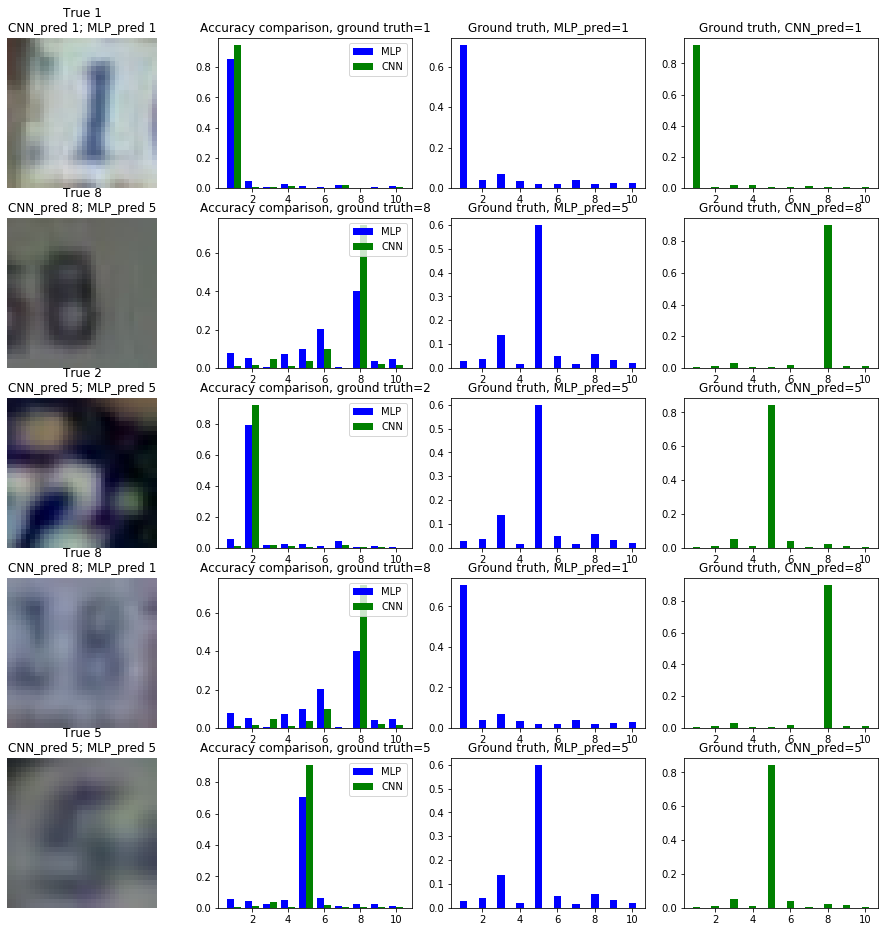

In [19]:
fig, ax = plt.subplots(5, 4, figsize=(16,16))
for i in range(5):
    img=x_show[...,i]
    ax[i,0].axis('Off')
    ax[i,0].set_title('True '+str(y_show[i])+"\nCNN_pred "+str(CNN_pred[numbers_show[i]])+"; MLP_pred "+str(MLP_pred[numbers_show[i]]))
    ax[i,0].imshow(img)
    X=np.arange(10)+1
    ax[i,1].set_title('Accuracy comparison, ground truth='+str(y_show[i]))
    ax[i,1].bar(X - 0.20, MLP_table[y_show[i]-1], color = 'b', width = 0.4)
    ax[i,1].bar(X + 0.20, CNN_table[y_show[i]-1], color = 'g', width = 0.4)
    ax[i,1].legend(['MLP', 'CNN'], loc='upper right')
    ax[i,2].set_title('Ground truth, MLP_pred='+str(MLP_pred[numbers_show[i]]))
    ax[i,2].bar(X, MLP_table2[MLP_pred[numbers_show[i]]-1], color = 'b', width = 0.4)
    ax[i,3].set_title('Ground truth, CNN_pred='+str(CNN_pred[numbers_show[i]]))
    ax[i,3].bar(X, CNN_table2[CNN_pred[numbers_show[i]]-1], color = 'g', width = 0.4)
#   ax[i,2].legend(['MLP', 'CNN'], loc='upper right')
plt.show()